#Class 3 Python

The information in this notebook is a combination of original material, and that sourced from [GWC](https://https://github.com/GWC-DCMB)

- GWC also has some really good additional materials and [youtube videos](https://https://github.com/GWC-DCMB/curriculum-notebooks)

### Introduction to Pandas

You may have used a program like Microsoft Excel or Google Sheets to record data or perform calculations for school. Datasets are often organized in rows and columns. Does anyone have an example of a using spreadsheets in school? (e.g. recording measurements in biology class, budgeting for personal finance in econ, etc.)



| Product | Price | Quantity Sold |
|--------------|-------------|------------------------|
| Apples  | \$ 1.50 | 26 |
| Bananas | \$  0.50 | 32 |
| Lemons | \$ 1.99 | 17 |

In this case, we have prices of fruit from a grocery store. Each row in this dataset is a type of fruit, and each column is an observation or measurement. What measurements do we have here?

###Attributes of a Tabular Dataset

A tabular dataset is a data structure that has rows and columns.
- `Fields`: A field is another name for columns that make up a dataset. Field names should be unique and not repeated.
- `Records`: A record is another name for rows that make up a dataset. These are also called observations
- `Index`: An index gives an identifier to a datasets records, similar to field names. By default, Pandas creates an index 0,1,2,3,4....

##1. Basic Exploration of a Pandas DataFrame

Don't forget to import Pandas!

We're going to be using `pandas` a lot. To save us some time typing, let's tell Python to rename the package for us to something a little shorter:

In [ ]:
import pandas as pd

Basic method to create a DataFrame... More to come in a later section

In [ ]:
#-- You can pass a dictionary object to the pandas.DataFrame() function....
#-- It expects that the keys would correspond to columns (or fields), and the
#-- and the values be a list. Note that the lists should all be of the same
#-- length
dictionary =     {
    'Product'     : ['Apples', 'Bananas', 'Lemons', 'Peaches', 'Water Melon', 'Strawberry'],
    'Price'       : [1.50, 0.50, 1.99, 4.00, 50, 1.89],
    'QuantitySold': [26, 32, 17, 20, 14, 7],
    'State'       : ['Virginia', 'Virginia', 'North Carolina', 'North Carolina', 'North Carolina', 'North Carolina']
}
df = pd.DataFrame(dictionary)

In [4]:
#-- Now we can print the DataFrame object and see what it looks like!
#-- Notice the index that is automatically created
print(df)

       Product  Price  QuantitySold           State
0       Apples   1.50            26        Virginia
1      Bananas   0.50            32        Virginia
2       Lemons   1.99            17  North Carolina
3      Peaches   4.00            20  North Carolina
4  Water Melon  50.00            14  North Carolina
5   Strawberry   1.89             7  North Carolina


Use the .head(), or .tail() function to view the top or bottom of a DataFrame

In [5]:
#-- by default, this will print the first five rows
df.head()

,Product,Price,QuantitySold,State
0,Apples,1.50,26,Virginia
1,Bananas,0.50,32,Virginia
2,Lemons,1.99,17,North Carolina
3,Peaches,4.00,20,North Carolina
4,Water Melon,50.00,14,North Carolina


In [6]:
#-- You can control the number of rows by passing a number into the method
df.head(10)

,Product,Price,QuantitySold,State
0,Apples,1.50,26,Virginia
1,Bananas,0.50,32,Virginia
2,Lemons,1.99,17,North Carolina
3,Peaches,4.00,20,North Carolina
4,Water Melon,50.00,14,North Carolina
5,Strawberry,1.89,7,North Carolina


In [7]:
#-- To view the bottom of the dataset, use .tail()
df.tail(3)

,Product,Price,QuantitySold,State
3,Peaches,4.00,20,North Carolina
4,Water Melon,50.00,14,North Carolina
5,Strawberry,1.89,7,North Carolina


In [9]:
df.sample(2)

,Product,Price,QuantitySold,State
5,Strawberry,1.89,7,North Carolina
2,Lemons,1.99,17,North Carolina


In [10]:
#-- To view the names of the fields within the datasets
df.columns

Index(['Product', 'Price', 'QuantitySold', 'State'], dtype='object')

Now that we know what columns are in a DataFrame,
what if we want to do something with one column?
e.g. slicing. In a way
Slicing a DataFrame works very similarly to
accessing a dictionary with keys

In [11]:
df['State']

,State
0,Virginia
1,Virginia
2,North Carolina
3,North Carolina
4,North Carolina
5,North Carolina


In [12]:
df.State

,State
0,Virginia
1,Virginia
2,North Carolina
3,North Carolina
4,North Carolina
5,North Carolina


When you slice a DataFrame, the result is no longer a `Pandas DataFrame`
It is actually called a `Pandas Series`, more to come on this later, but
they have similar but not the same methods... for example, we can also
use the `.head()` method on a `Series`

In [13]:
df['Product'].head(3)

,Product
0,Apples
1,Bananas
2,Lemons


In [14]:
#-- How to view the number of fields, records (e.g. shape of the dataset)?

'''
(6, 4) --> 6 records; 4 columns
'''
df.shape

(6, 4)

In [15]:
#-- You can also use len() function
len(df)

6

In [16]:
#-- You can easily get summary stats on a DataFrame
df.describe()

,Price,QuantitySold
count,6.000000,6.000000
mean,9.980000,19.333333
std,19.638889,8.846845
min,0.500000,7.000000
25%,1.597500,14.750000
50%,1.940000,18.500000
75%,3.497500,24.500000
max,50.000000,32.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       6 non-null      object 
 1   Price         6 non-null      float64
 2   QuantitySold  6 non-null      int64  
 3   State         6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes


It is often very useful to get value counts on a particular field, for example
Lets see what state appears the most...

This would also be an example of a method that works with `Series`, but not
`DataFrames`

In [18]:
df['State'].value_counts()

,count
State,
North Carolina,4
Virginia,2


Sorting!

In [19]:
#-- Ascending
df = df.sort_values('Price')
df.head()

,Product,Price,QuantitySold,State
1,Bananas,0.50,32,Virginia
0,Apples,1.50,26,Virginia
5,Strawberry,1.89,7,North Carolina
2,Lemons,1.99,17,North Carolina
3,Peaches,4.00,20,North Carolina


In [20]:
#-- Descending
df = df.sort_values('Price', ascending=False)
df.head()

,Product,Price,QuantitySold,State
4,Water Melon,50.00,14,North Carolina
3,Peaches,4.00,20,North Carolina
2,Lemons,1.99,17,North Carolina
5,Strawberry,1.89,7,North Carolina
0,Apples,1.50,26,Virginia


In [21]:
#-- Create a new column, notice that the calculations apply to the entire
#-- field without having to do a for-loop
df['Revenue'] = df['Price'] * df['QuantitySold']
df.head()

,Product,Price,QuantitySold,State,Revenue
4,Water Melon,50.00,14,North Carolina,700.00
3,Peaches,4.00,20,North Carolina,80.00
2,Lemons,1.99,17,North Carolina,33.83
5,Strawberry,1.89,7,North Carolina,13.23
0,Apples,1.50,26,Virginia,39.00


## 2. Creating DataFrames, Reading DataFrames, and Writing DataFrames

A Pandas DataFrame can be created many different ways and from many different file types.



- Create a DataFrame
- Reading/Writing Data
  - csv
  - xlsx
  - Among many others
- Web


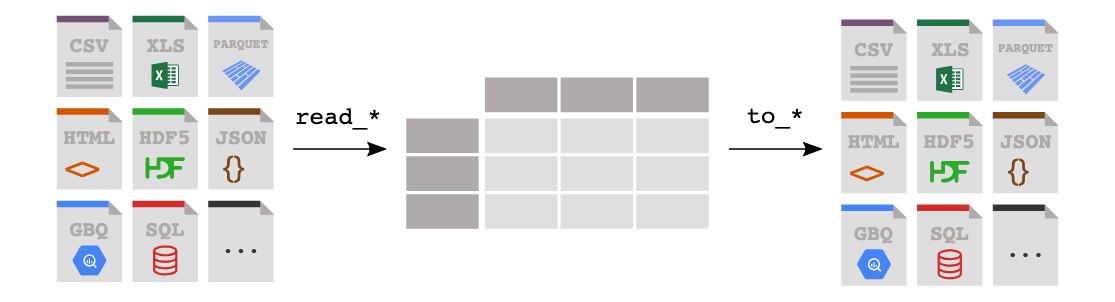

### Creating a DataFrame Manually

In [ ]:
dictionary =     {
    'Product'     : ['Apples', 'Bananas', 'Lemons', 'Peaches', 'Water Melon', 'Strawberry'],
    'Price'       : [1.50, 0.50, 1.99, 4.00, 50, 1.89],
    'QuantitySold': [26, 32, 17, 20, 14, 7]
}
df = pd.DataFrame(dictionary)

### Reading and Writing Data

## Google Colab Specifics

To `import` data, in Google Colab, you must add the data into their specific environment.

#### Step 1: Select the folder button

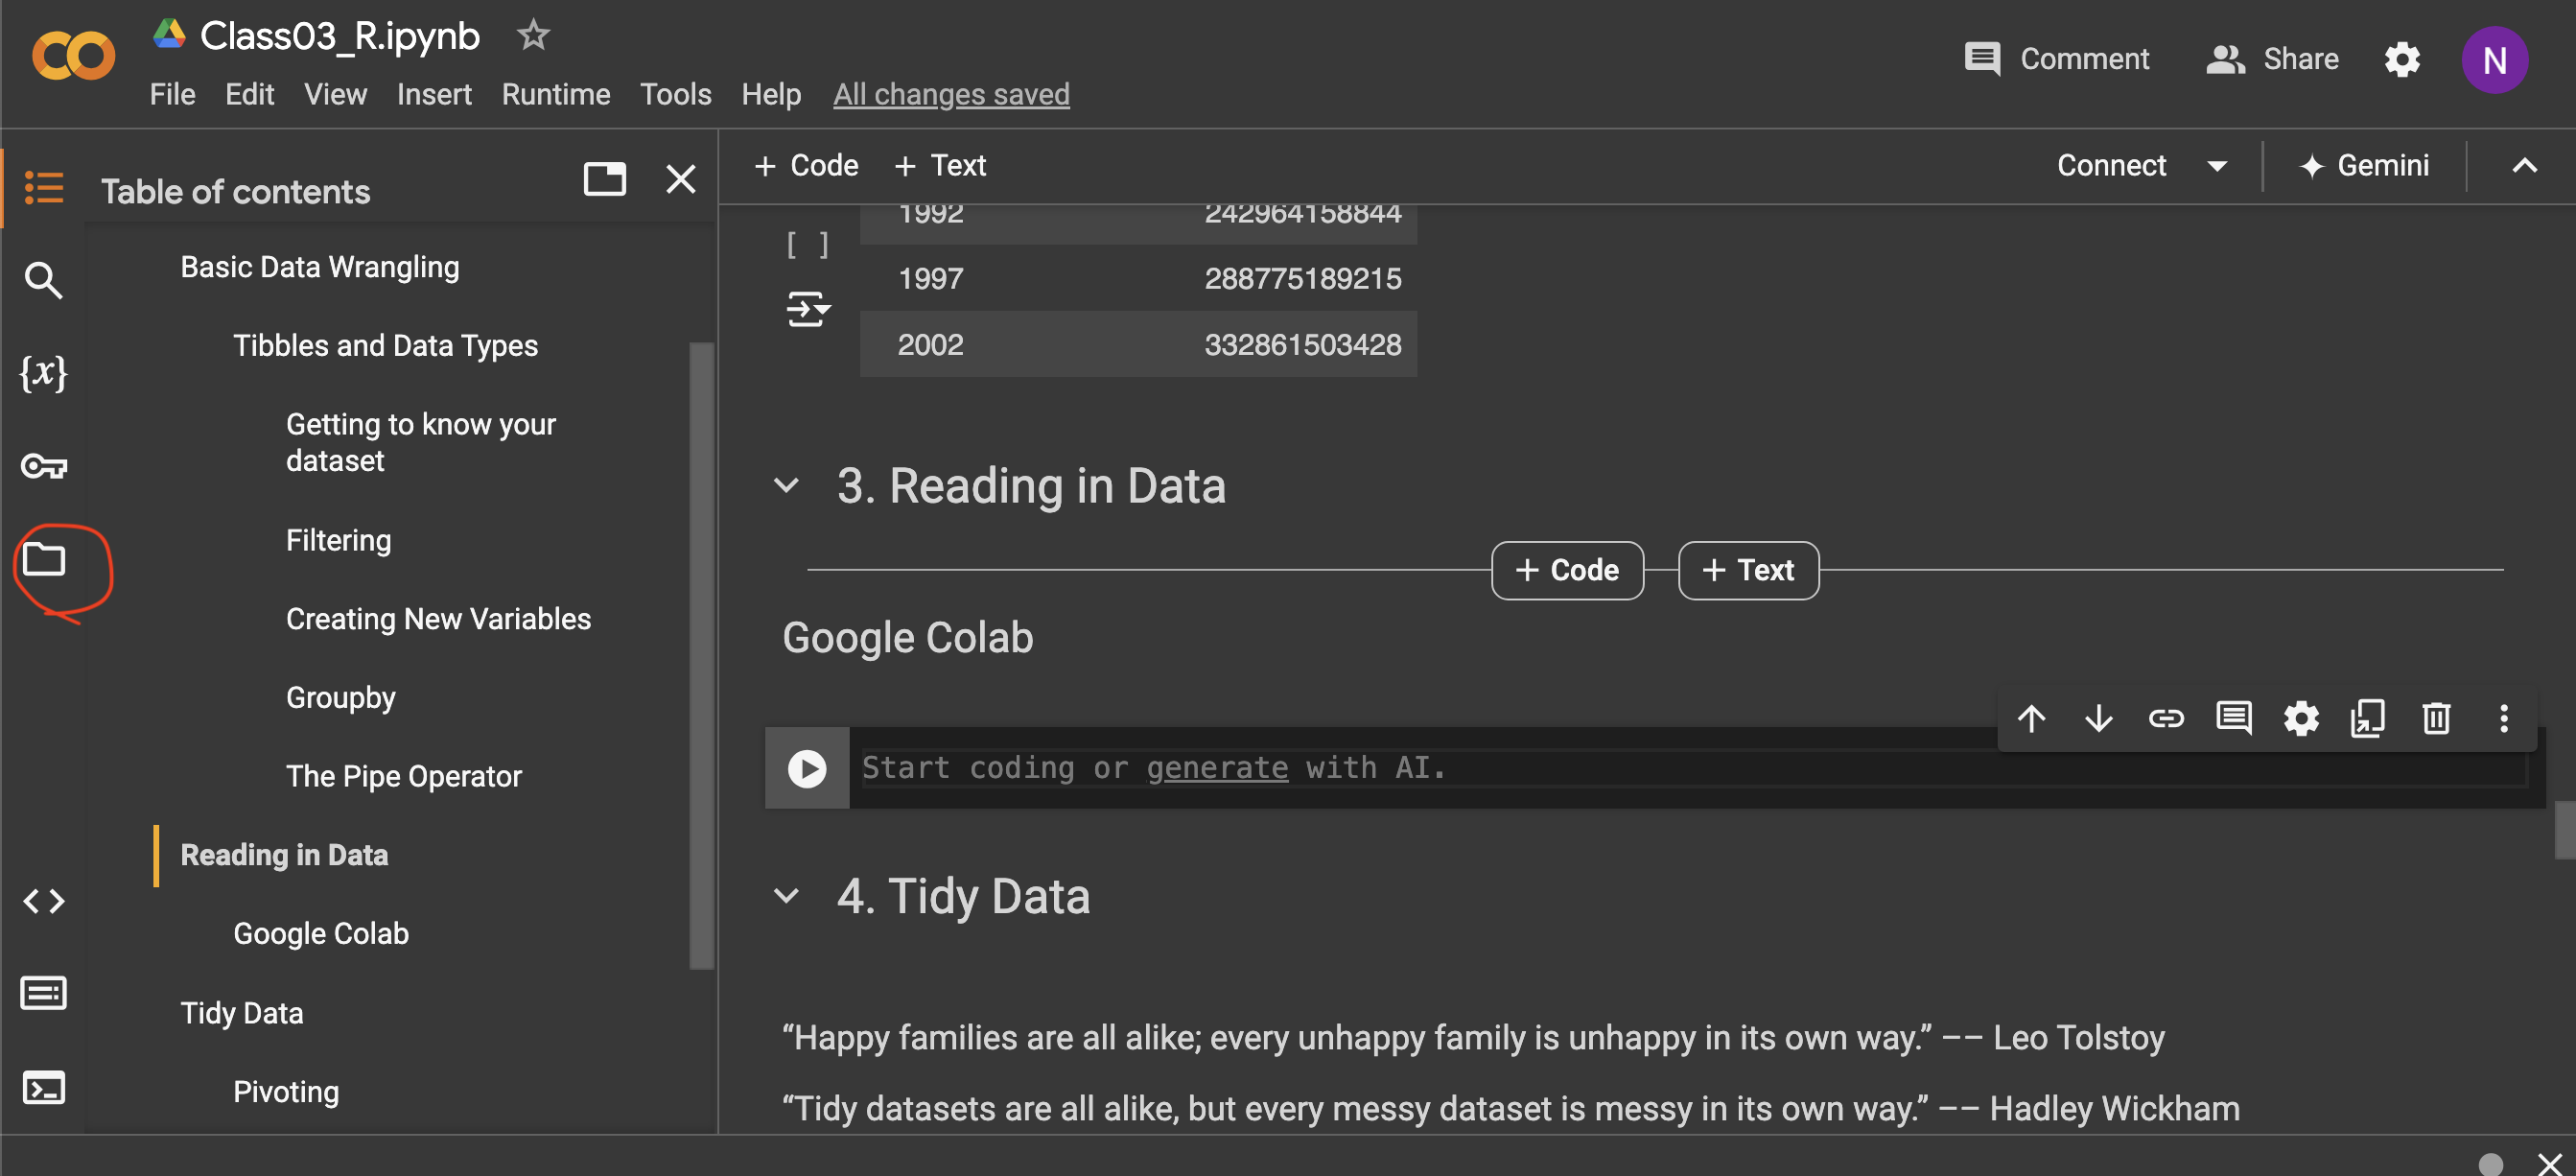

#### Step 2: Use the upload button, or drag and drop your file

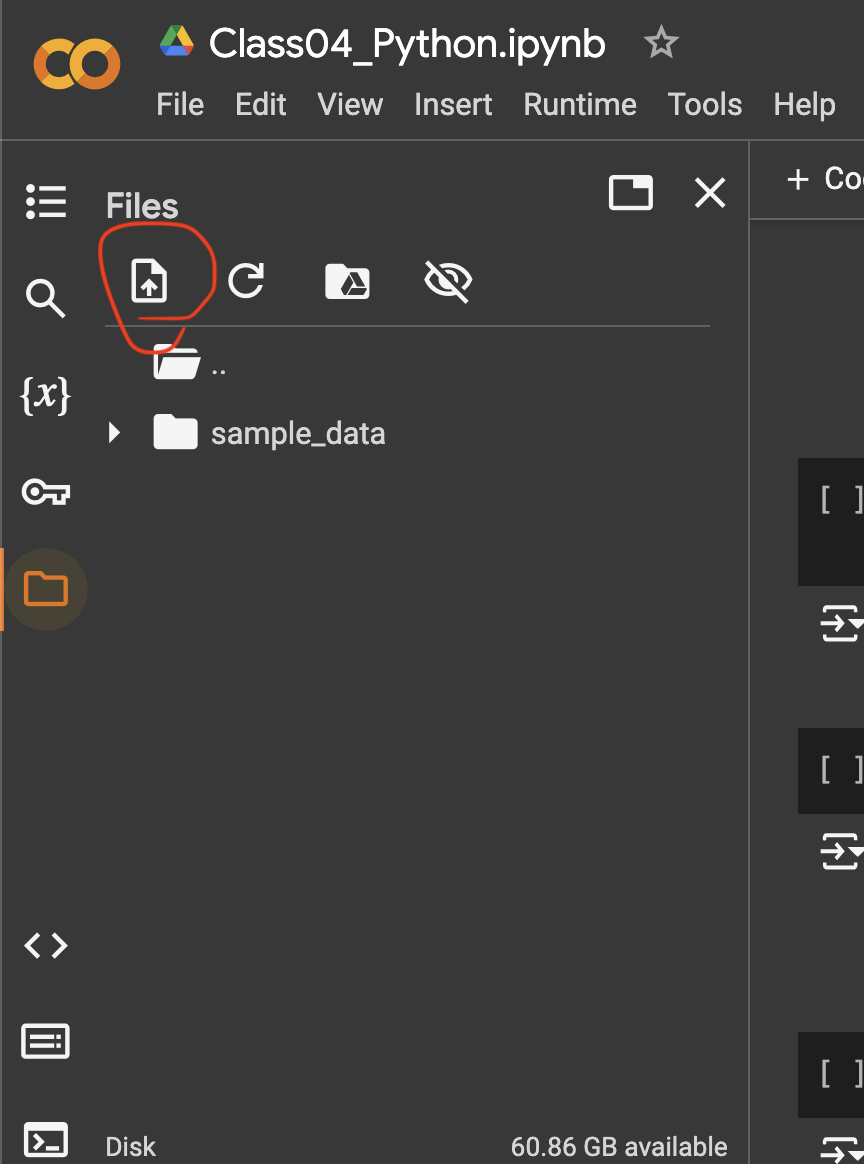

### Reading data!

In [ ]:
path + 'SampleData/tips.csv'

In [ ]:
# load the tips csv, on a website
path = 'https://raw.githubusercontent.com/GWC-DCMB/curriculum-notebooks/master/'
tips = pd.read_csv(path + 'SampleData/tips.csv')
tips.head()

In [22]:
tips = pd.read_csv('tips.csv')


In [23]:
tips.shape

(244, 7)

In [ ]:
#-- To read in a local csv, xlsx etc, you will need to download and
#-- upload to the Colab file management using rhe file icon on the
#-- left side of the screen
detroit_weather = pd.read_csv('detroit_weather.csv')
detroit_weather.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
detroit_weather.to_excel('new Detroit Weather.xlsx')

##3. Wide v. Long Dataset
- Pivoting, Melting
- Transposing


There is never one way to structure a dataset, and often times you will need to change the structure of the dataset, to achieve different tasks or calculations.
Generally, for analysis you should have a bias for long data instead of wide data.

Let's look at some examples....

A dataset can be written in two different formats: wide and long.

A `wide format` contains values that do not repeat in the first column.

A `long format` contains values that do repeat in the first column.

For example, consider the following two datasets that contain the exact same data expressed in different formats:
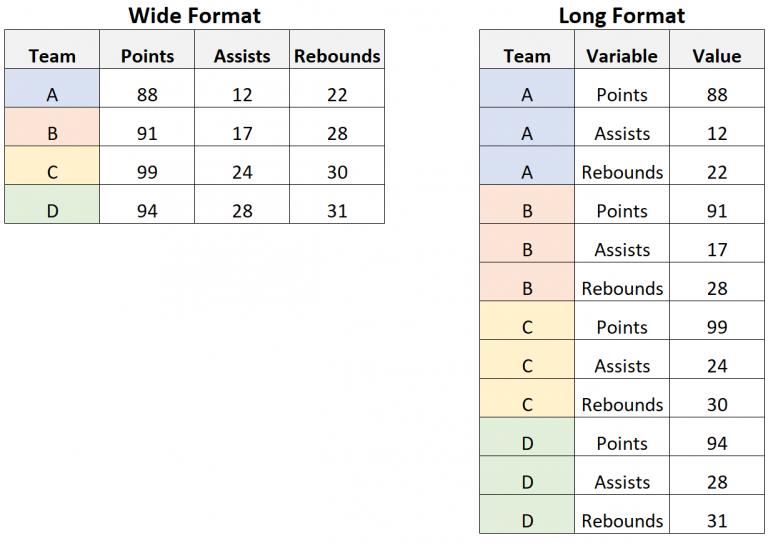

### Making a Dataset Longer

In [24]:
import pandas as pd
path = 'https://raw.githubusercontent.com/GWC-DCMB/curriculum-notebooks/master/'
tips = pd.read_csv(path + 'SampleData/tips.csv')

#-- First, lets create a unique ID for each "Table"
tips["Table_ID"] = ["Table_"+str(i) for i in range(0, tips.shape[0])]


tips.head()

,total_bill,tip,sex,smoker,day,time,size,Table_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,Table_0
1,10.34,1.66,Male,No,Sun,Dinner,3,Table_1
2,21.01,3.50,Male,No,Sun,Dinner,3,Table_2
3,23.68,3.31,Male,No,Sun,Dinner,2,Table_3
4,24.59,3.61,Female,No,Sun,Dinner,4,Table_4


In [25]:

#-- First, lets create a unique ID for each "Table"
tips["Table_ID"] = ["Table_"+str(i) for i in range(0, tips.shape[0])]

#-- To make the data long, lets use the melt function
tips_long = tips.melt(id_vars=['Table_ID'])

#-- Sort and display head
tips_long.sort_values('Table_ID').head(10)

,Table_ID,variable,value
0,Table_0,total_bill,16.99
488,Table_0,sex,Female
732,Table_0,smoker,No
976,Table_0,day,Sun
1220,Table_0,time,Dinner
1464,Table_0,size,2
244,Table_0,tip,1.01
1465,Table_1,size,3
245,Table_1,tip,1.66
733,Table_1,smoker,No


Making a Dataset Wider

In [26]:
#-- Lets put the dataset the back the way we found it...
tips_back_to_normal = tips_long.pivot(index='Table_ID', columns='variable', values='value').reset_index()
tips_back_to_normal.head()

variable,Table_ID,day,sex,size,smoker,time,tip,total_bill
0,Table_0,Sun,Female,2,No,Dinner,1.01,16.99
1,Table_1,Sun,Male,3,No,Dinner,1.66,10.34
2,Table_10,Sun,Male,2,No,Dinner,1.71,10.27
3,Table_100,Fri,Female,2,Yes,Dinner,2.5,11.35
4,Table_101,Fri,Female,2,Yes,Dinner,3.0,15.38


In [29]:
tips_back_to_normal = tips_long.pivot(index='Table_ID', columns='variable', values='value').reset_index()


##4. Aggregating Data for EDA

Grouping records by column(s) is a common need for data analyses. Such scenarios include counting employees in each department of a company, calculating the average salary of male and female employees respectively in each department, and calculating the average salary of employees of different ages. Pandas has groupby function to be able to handle most of the grouping tasks conveniently. But there are certain tasks that the function finds it hard to manage. Here let’s examine these “difficult” tasks and try to give alternative solutions.

groupby is one of the most important Pandas functions. It is used to group and summarize records according to the split-apply-combine strategy. The following diagram shows the workflow:

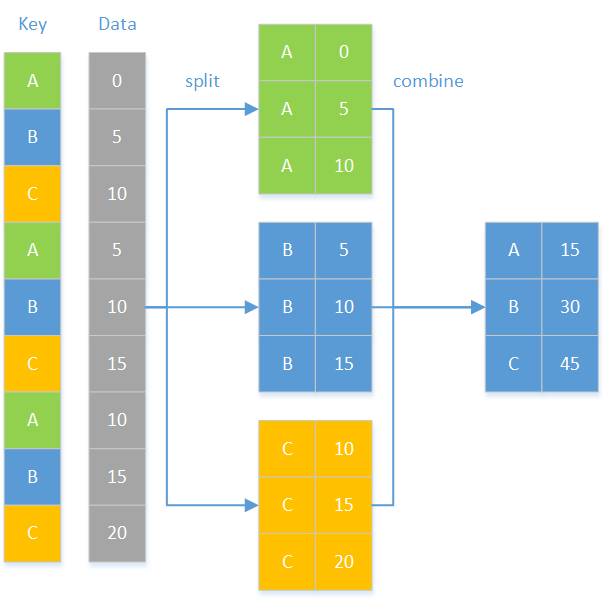

|The Pandas Groupby function uses the below syntax as an example
```
tips.groupby('time')['tip'].count()
```
Lets break this down...
- `tips`: a Pandas DataFrame object
- `.groupby()`: the method name
- `'time'`: .groupby() takes a list or string representing the column(s) you want to groupby
- `['tip']`: The column(s) you want to apply a calculation to
- `.count()`: The calculation you want to apply.

In [ ]:
#-- from the example above!
df.groupby("key")["Data"].sum()

In [30]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size,Table_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,Table_0
1,10.34,1.66,Male,No,Sun,Dinner,3,Table_1
2,21.01,3.50,Male,No,Sun,Dinner,3,Table_2
3,23.68,3.31,Male,No,Sun,Dinner,2,Table_3
4,24.59,3.61,Female,No,Sun,Dinner,4,Table_4


In [31]:
tips["time"].value_counts()

,count
time,
Dinner,176
Lunch,68


In [32]:
tips.groupby('day')['total_bill'].sum()

,total_bill
day,
Fri,325.88
Sat,1778.40
Sun,1627.16
Thur,1096.33


In [34]:
tips.groupby('day')['total_bill'].mean()

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


In [35]:
#-- Using the tips data, calculate the average tip and total by day
#-- of the week
mean_by_day = tips.groupby('day')[['total_bill', 'tip']].mean().reset_index()
mean_by_day

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [36]:
#-- Using the tips data, calculate the median tip and total by day
#-- of the week
median_by_day = tips.groupby('day')[['total_bill', 'tip', 'size']].median()
median_by_day

,total_bill,tip,size
day,,,
Fri,15.38,3.000,2.0
Sat,18.24,2.750,2.0
Sun,19.63,3.150,2.0
Thur,16.20,2.305,2.0


In [37]:
#-- Using the tips data, calculate the max tip and total by day
#-- of the week
max_by_day = tips.groupby('day')[['total_bill', 'tip']].max()
max_by_day

,total_bill,tip
day,,
Fri,40.17,4.73
Sat,50.81,10.00
Sun,48.17,6.50
Thur,43.11,6.70


In [ ]:
max_by_day["perc"] = max_by_day["tip"] / max_by_day["total_bill"]
max_by_day.sort_values("perc", ascending=False)

In [ ]:
#-- Calculate the mean by meal type
mean_by_time = tips.groupby('time')['tip'].mean()
mean_by_time

In [ ]:
#-- Calculate the mean by meal type
mean_by_type = tips.groupby('sex')['tip'].mean()
mean_by_type

In [ ]:
#-- Calculate the sample size (# of records) by meal type
#-- Calculate the mean by meal type
count_by_type = tips.groupby('time')['tip'].count()
count_by_type

In [ ]:
#-- Can you groupby multiple columns?
# Of course!
_ = tips.groupby(['time', 'sex'])['tip'].count().reset_index()
_

In [ ]:
#-- Notice that when you groupby, the column you groupedby becomes the
#-- index. You can use the .reset_index() method to fix this
count_by_type = tips.groupby('time')['tip'].count()
print("The meal type is now the index...")
print(count_by_type.index)
count_by_type = count_by_type.reset_index()
print("\n\nafter restting, the index is back to numeric...")
print(count_by_type.index)
count_by_type

In [ ]:
tips.head()

In [ ]:
tips.groupby('time').agg({'tip': 'mean', 'total_bill':'max'})

##5. Slicing DataFrames
- loc and iloc
- Filtering

###Slicing Columns
- Back to the Tips data, lets create a smaller DataFrame with only 3 columns

In [ ]:
tips.head()

In [ ]:
tips.iloc[:, [0, 1, 2]]

In [ ]:
type(tips[["sex"]])

In [ ]:
tips.loc[:, ['smoker', 'total_bill', 'tip']]

###Slicing Rows
Now we've learned how to subset columns. How do we subset rows? We use a `method` of `DataFrame` called `iloc`. When you see `iloc`, think "index location" -- because we want to get the location where the row is a certain index.
- `loc` is label-based, which means that you have to specify rows and columns based on their row and column labels.
- `iloc` is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

####`loc`- Value based

In [38]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,Table_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,Table_0
1,10.34,1.66,Male,No,Sun,Dinner,3,Table_1
2,21.01,3.50,Male,No,Sun,Dinner,3,Table_2
3,23.68,3.31,Male,No,Sun,Dinner,2,Table_3
4,24.59,3.61,Female,No,Sun,Dinner,4,Table_4


In [39]:
tips.loc[0]

,0
total_bill,16.99
tip,1.01
sex,Female
smoker,No
day,Sun
time,Dinner
size,2
Table_ID,Table_0


In [40]:
tips.iloc[0]

,0
total_bill,16.99
tip,1.01
sex,Female
smoker,No
day,Sun
time,Dinner
size,2
Table_ID,Table_0


In [ ]:
tips.loc[tips["sex"] == "Female"]

In [ ]:
#-- Return the record with index=3, all columns
tips.iloc[3]

In [41]:
#-- Return the record with index=3, just the tip
tips.loc[3, 'total_bill']

23.68

In [42]:
tips.loc[3:5, 'total_bill']

,total_bill
3,23.68
4,24.59
5,25.29


In [43]:
tips.iloc[0, 3]

'No'

In [45]:
tips.loc[0, "smoker"]

'No'

Using Boolean Lists to Filter
Most of the time, we want to use slicing not to get a single record, but rather
to filter the dataset

In [46]:
tips['tip'].describe()

,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


In [ ]:
#-- Filter to get only records above a 5% tip
#---- Step 1. Generate boolean list
tips_above_100_bool = tips['tip'] >= 5
print(tips_above_100_bool.sum())
tips_above_100_bool

In [ ]:
tips.shape

In [ ]:
tips_above_100_bool.shape

In [48]:
#---- Step 2. Use the boolean list to filter
#----         and create a subset DataFrame
df_above_5 = tips.loc[tips_above_100_bool]
print(df_above_5.shape)
df_above_5.head()

(28, 8)


,total_bill,tip,sex,smoker,day,time,size,Table_ID
11,35.26,5.00,Female,No,Sun,Dinner,4,Table_11
23,39.42,7.58,Male,No,Sat,Dinner,4,Table_23
39,31.27,5.00,Male,No,Sat,Dinner,3,Table_39
44,30.40,5.60,Male,No,Sun,Dinner,4,Table_44
46,22.23,5.00,Male,No,Sun,Dinner,2,Table_46


In [ ]:
tips.loc[tips['tip'] >= 5]

In [ ]:
#--- We can also just combine this into 1 line
df_above_5 = tips.loc[tips['tip'] >= 5]
df_above_5.head()


In [ ]:
tips.loc[tips['time'] == 'Lunch']

In [ ]:
tips.loc[tips['total_bill'] >= tips['total_bill'].mean()]

In [ ]:
tips.loc[tips['tip'] >= tips['total_bill']]

####`iloc`- integer-based

In [ ]:
#-- Return the record with index=3, all columns
#----tips.loc[3]
tips.iloc[3, :]

In [ ]:
#-- Return the record with index=3, just the tip
#----- tips.loc[3, 'total_bill']
tips.iloc[3, 0]

##6. Pandas and DataTypes?

###Dtypes
In pandas, data types are referred to as dtypes. Each column in a DataFrame can have a different dtype, depending on the type of data it contains. Common dtypes in pandas include int, float, object, datetime, and bool.

By default, pandas will try to infer the dtype of each column based on the data it contains. However, this can sometimes result in unexpected or incorrect dtypes. Therefore, it is important to manually set dtypes when working with large datasets or when the data types are known in advance.



In [51]:
# create a sample DataFrame
df = pd.DataFrame({
    'A': ['1', '2', '3'],
    'B': ['2.0', '3.0', '4.0'],
    'C': ['apple', 'banana', 'cherry']
})
df.dtypes

,0
A,object
B,object
C,object


In [52]:
# We can also set or cast data types
df['A'] = df['A'].astype(int)
df['B'] = df['B'].astype(float)
df['C'] = df['C'].astype(str)
df.dtypes

,0
A,int64
B,float64
C,object


In [50]:
tips["total_bill"].dtype

dtype('float64')

### DataFrame v. Series
A `Pandas DataFrame` is a two-dimensional data structure that can be thought of as a spreadsheet. It can also be thought of as a collection of two or more series with common indices.

A `Pandas Series` is a one-dimensional data structure that comprises of key-value pair, where keys/labels are the indices and values are the values stored on that index. It is similar to a python dictionary, except it provides more freedom to manipulate and edit the data.


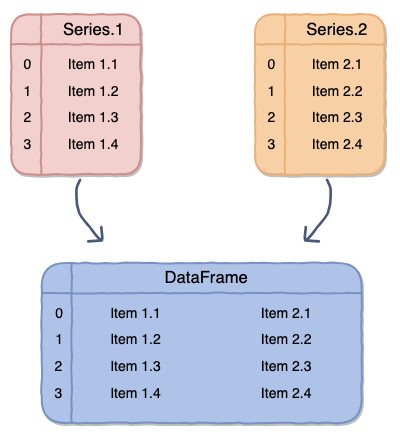

In [53]:
#-- We have already seen how to create a DataFrame, though you likely will not
#-- do this often, you canc create a Series as follows
s = pd.Series([1,2,3,4,5,6,7])
s.head()

,0
0,1
1,2
2,3
3,4
4,5


In [54]:
type(s)

pandas.core.series.Series

In [55]:
type(tips)

pandas.core.frame.DataFrame

##7. Non-Exhaustive List of Pandas Methods and Attribute
A `method` is a essentially a function that is run on an object. We have already used many methods in this class such as str.isnumeric(). A method always has parenthesis! Pandas has its own collection of methods that are very helpful for exploring a dataset.

`Attributes` are like methods, but instead of transforming the variables or data, they are used to give you more information about the data that you have. Pandas Series objects come with a number of built in attributes that can be called on them. Thet do not have parenthesis.


### Useful Pandas DataFrame and Series `Methods`
| Method  | Description            | Applies to |
|---------|------------------------|------------|
| .head() | Views the top n records | Both |
| .tail() | Views the bottom n records | Both |
| .sort_values() | Sorts by a column(s) | Both |
| .set_index() | Set a field to be the index | Both |
| .reset_index() | Reset the index to be 0,1,2,3..n | Both |
| .value_counts()| Counts instances of each distinct value | Series|
| .describe()| Summary statistics | Both|
| .info()| Information on data types | Both|
| .astype() | Useful for converting between datatypes | Both |


### Useful Pandas DataFrame and Series `Attributes`
| Method  | Description            | Applies to |
|---------|------------------------|------------|
| .columns | returns the column names | DataFrame |
| .shape | returns a tuple of length, width of dataset | Both |

## Joins

`Outer Join`
Let’s say you want to have a table that contains all your user and event table data together.

You would use an Outer Join to join the tables together. An outer join combines the columns from all tables on one or more common dimension when possible, and includes all data from all tables.

`Inner Join`
What if you want to have a table that contains only users that have done an action?

You would use an Inner Join to join the tables together. An inner join combines the columns on a common dimension (the first N columns) when possible, and only includes data for the columns that share the same values in the common N column(s). In the example, the User ID would be the common dimension used for the inner join.

`Left Join`
Now, what if you want to have a table that contains all the users’ data and only actions that those users have done? Actions performed by other users not in the users table should not be included?

You would use a Left Join to join the tables together. A left join combines the columns on a common dimension (the first N columns) when possible, returning all rows from the first table with the matching rows in the consecutive tables. The result is NULL in the consecutive tables when there is no match. In this case, we would make the User Table the first (left table) to use for the left join.

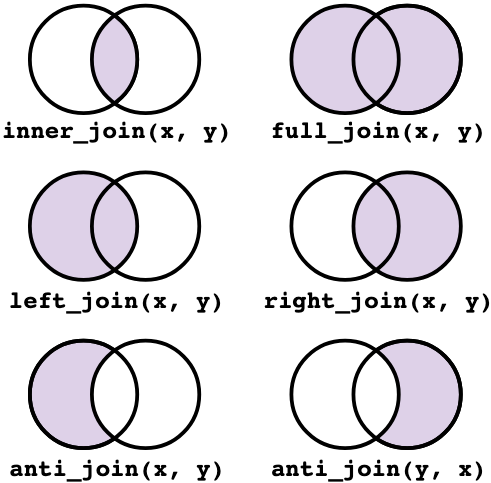

In [56]:
#-- Source https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
import pandas as pd
product=pd.DataFrame({
    'Product_ID':[101,102,103,104,105,106,107],
    'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop'],
    'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics'],
    'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0],
    'Seller_City':['Delhi','Mumbai','Chennai','Kolkata','Delhi','Chennai','Bengalore']
})
customer=pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9],
    'name':['Olivia','Aditya','Cory','Isabell','Dominic','Tyler','Samuel','Daniel','Jeremy'],
    'age':[20,25,15,10,30,65,35,18,23],
    'Product_ID':[101,0,106,0,103,104,0,0,107],
    'Purchased_Product':['Watch','NA','Oil','NA','Shoes','Smartphone','NA','NA','Laptop'],
    'City':['Mumbai','Delhi','Bangalore','Chennai','Chennai','Delhi','Kolkata','Delhi','Mumbai']
})


In [57]:
product


,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi
5,106,Oil,Grocery,110.0,Chennai
6,107,Laptop,Electronics,79999.0,Bengalore


In [58]:
customer

,id,name,age,Product_ID,Purchased_Product,City
0,1,Olivia,20,101,Watch,Mumbai
1,2,Aditya,25,0,NA,Delhi
2,3,Cory,15,106,Oil,Bangalore
3,4,Isabell,10,0,NA,Chennai
4,5,Dominic,30,103,Shoes,Chennai
5,6,Tyler,65,104,Smartphone,Delhi
6,7,Samuel,35,0,NA,Kolkata
7,8,Daniel,18,0,NA,Delhi
8,9,Jeremy,23,107,Laptop,Mumbai


In [ ]:
customer.shape

### Left Join

In [59]:
pd.merge(customer, product, how="left", on="Product_ID")

,id,name,age,Product_ID,Purchased_Product,City,Product_name,Category,Price,Seller_City
0,1,Olivia,20,101,Watch,Mumbai,Watch,Fashion,299.0,Delhi
1,2,Aditya,25,0,NA,Delhi,NaN,NaN,NaN,NaN
2,3,Cory,15,106,Oil,Bangalore,Oil,Grocery,110.0,Chennai
3,4,Isabell,10,0,NA,Chennai,NaN,NaN,NaN,NaN
4,5,Dominic,30,103,Shoes,Chennai,Shoes,Fashion,2999.0,Chennai
5,6,Tyler,65,104,Smartphone,Delhi,Smartphone,Electronics,14999.0,Kolkata
6,7,Samuel,35,0,NA,Kolkata,NaN,NaN,NaN,NaN
7,8,Daniel,18,0,NA,Delhi,NaN,NaN,NaN,NaN
8,9,Jeremy,23,107,Laptop,Mumbai,Laptop,Electronics,79999.0,Bengalore


### Inner

In [60]:
pd.merge(customer, product, how="inner", on="Product_ID")

,id,name,age,Product_ID,Purchased_Product,City,Product_name,Category,Price,Seller_City
0,1,Olivia,20,101,Watch,Mumbai,Watch,Fashion,299.0,Delhi
1,3,Cory,15,106,Oil,Bangalore,Oil,Grocery,110.0,Chennai
2,5,Dominic,30,103,Shoes,Chennai,Shoes,Fashion,2999.0,Chennai
3,6,Tyler,65,104,Smartphone,Delhi,Smartphone,Electronics,14999.0,Kolkata
4,9,Jeremy,23,107,Laptop,Mumbai,Laptop,Electronics,79999.0,Bengalore


### Outer

In [61]:
pd.merge(customer, product, how="outer", on="Product_ID")

,id,name,age,Product_ID,Purchased_Product,City,Product_name,Category,Price,Seller_City
0,2.0,Aditya,25.0,0,NA,Delhi,NaN,NaN,NaN,NaN
1,4.0,Isabell,10.0,0,NA,Chennai,NaN,NaN,NaN,NaN
2,7.0,Samuel,35.0,0,NA,Kolkata,NaN,NaN,NaN,NaN
3,8.0,Daniel,18.0,0,NA,Delhi,NaN,NaN,NaN,NaN
4,1.0,Olivia,20.0,101,Watch,Mumbai,Watch,Fashion,299.0,Delhi
5,NaN,NaN,NaN,102,NaN,NaN,Bag,Fashion,1350.5,Mumbai
6,5.0,Dominic,30.0,103,Shoes,Chennai,Shoes,Fashion,2999.0,Chennai
7,6.0,Tyler,65.0,104,Smartphone,Delhi,Smartphone,Electronics,14999.0,Kolkata
8,NaN,NaN,NaN,105,NaN,NaN,Books,Study,145.0,Delhi
9,3.0,Cory,15.0,106,Oil,Bangalore,Oil,Grocery,110.0,Chennai


### Some common issues
- How to determine which type of join?
- What is the primary key to join on?
- Do primary keys have the same name? How do we deal with that if so?
- What about data types?
- Is the primary key unique? This can cause **BIG** issues!